<a href="https://colab.research.google.com/github/ramandeepp1403/paysim-fraud-detection/blob/main/paysimfraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,f1_score,precision_score,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0
14245,8,PAYMENT,11465.21,C1837637612,38.0,0.00,M1222093409,0.0,0.0,0.0,0.0


In [6]:
df.shape

(14247, 11)

In [7]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [9]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,14247.000000,1.424700e+04,1.424600e+04,1.424600e+04,1.424600e+04,1.424600e+04,14246.000000,14246.0
mean,5.037131,1.118848e+05,7.937369e+05,8.107136e+05,8.411336e+05,1.147629e+06,0.005475,0.0
std,2.463112,2.805152e+05,2.016693e+06,2.059984e+06,2.528174e+06,3.151706e+06,0.073794,0.0
min,1.000000,2.390000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,2.000000,4.585130e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,6.000000,1.286936e+04,2.041500e+04,8.216325e+03,0.000000e+00,0.000000e+00,0.000000,0.0
75%,7.000000,1.218917e+05,1.384956e+05,1.294173e+05,2.641427e+05,2.775150e+05,0.000000,0.0
max,8.000000,1.000000e+07,1.293042e+07,1.301050e+07,2.093759e+07,2.533027e+07,1.000000,0.0


In [10]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [11]:
df.isnull().sum().sum()

np.int64(7)

In [12]:
df= df.dropna()

In [13]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,C1925841262,0.0,0.00,M828869162,0.0,0.0,0.0,0.0
14242,8,PAYMENT,20924.47,C1540995845,18265.0,0.00,M1309313968,0.0,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,C1827218030,38369.0,0.00,C1292445663,167.0,0.0,0.0,0.0
14244,8,PAYMENT,3074.36,C1632817923,10242.0,7167.64,M2001030591,0.0,0.0,0.0,0.0


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,14168
1.0,78


In [17]:
df['isFraud'].value_counts(normalize=True)*100

,proportion
isFraud,
0.0,99.452478
1.0,0.547522


In [18]:
df.describe(include='object')

,type,nameOrig,nameDest
count,14246,14246,14246
unique,5,14246,9472
top,PAYMENT,C1837637612,C985934102
freq,7869,1,64


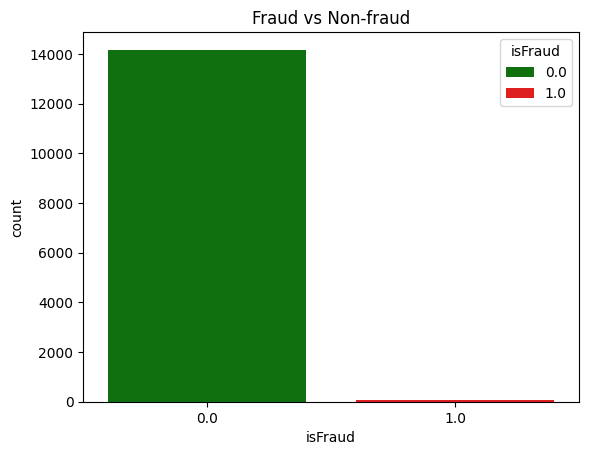

In [19]:
sns.countplot(data=df,x='isFraud',hue='isFraud', palette=['green', 'red'])
plt.title("Fraud vs Non-fraud")
plt.show()

In [20]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

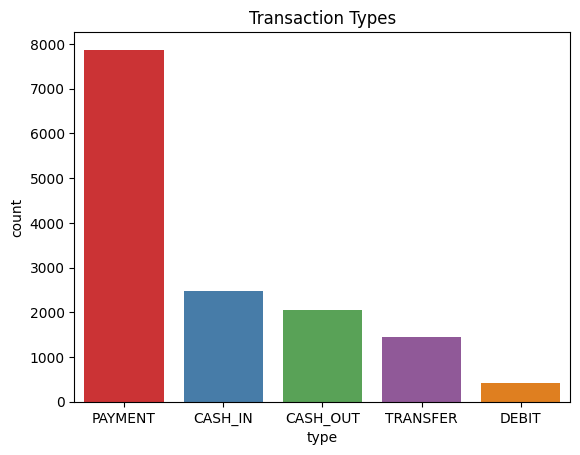

In [21]:
sns.countplot(data=df,x='type',order= df['type'].value_counts().index,palette='Set1')#orders the bars by frequency, from most common to least common.
plt.title('Transaction Types')
plt.show()

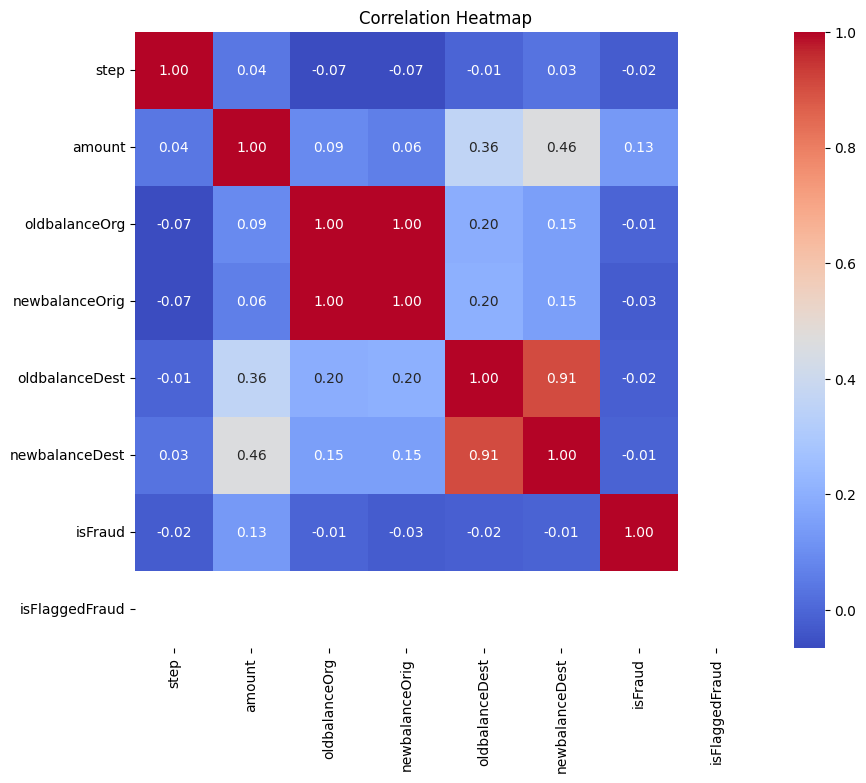

In [22]:
plt.figure(figsize=(10, 8))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
#see the exact correlation number printed inside each cell


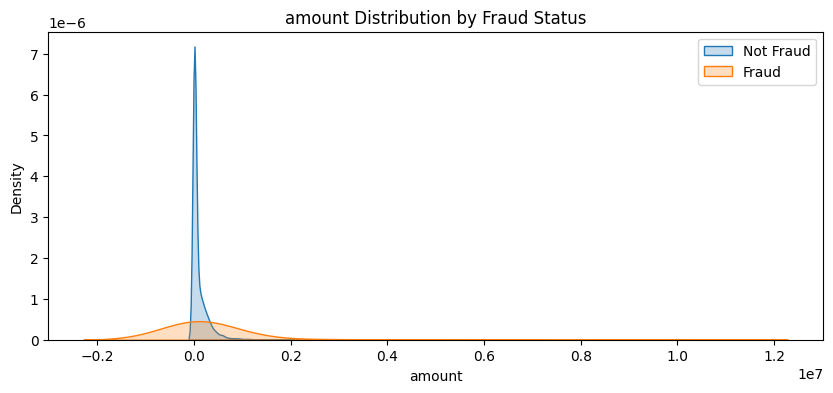

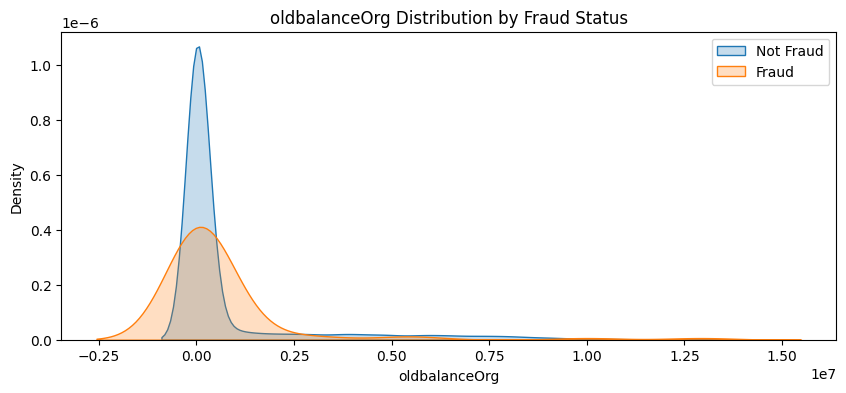

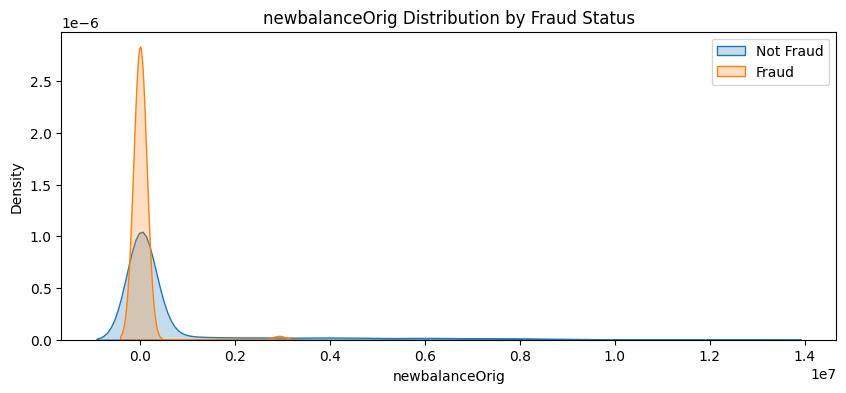

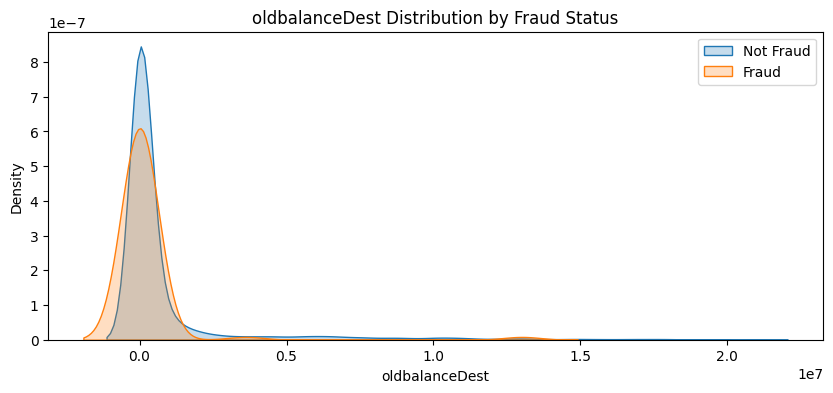

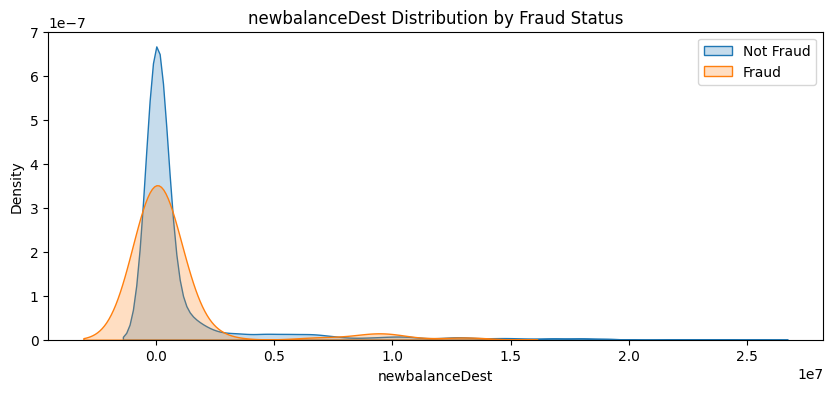

In [23]:
cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
for col in cols:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[df['isFraud']==0][col], label='Not Fraud', fill=True)
    sns.kdeplot(df[df['isFraud']==1][col], label='Fraud', fill=True)
    plt.title(f'{col} Distribution by Fraud Status')
    plt.legend()
    plt.show()
    #kdeplot stands for Kernel Density Estimate Plot. It’s a smoothed version of a histogram. Instead of showing bar heights (like histplot), it estimates the probability density function (PDF) of a variable.
#This helps you visually compare the distribution of each feature across the two classes.

In [24]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [25]:
le=LabelEncoder()


In [26]:
df.loc[:, 'type'] = le.fit_transform(df['type'])


In [27]:
#here im droppi9ng the uncessary columns
df.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)


In [28]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14241,8,3,35108.12,0.0,0.00,0.0,0.0,0.0
14242,8,3,20924.47,18265.0,0.00,0.0,0.0,0.0
14243,8,1,75244.54,38369.0,0.00,167.0,0.0,0.0
14244,8,3,3074.36,10242.0,7167.64,0.0,0.0,0.0


In [29]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [33]:
model = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)     #imp

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [34]:
y_pred= model.predict(X_test)

In [35]:
y_proba=model.predict_proba(X_test)[:,1]
#This returns a 2D array of probabilities.
#or a binary classification problem (0 = not fraud, 1 = fraud)
#You want fraud probability scores, not just 0/1

#AUC-ROC Curve

#Precision-Recall Curve

#Custom thresholds for classification

In [36]:
custom_threshold=0.90
y_pred=(y_proba> custom_threshold).astype(int)

In [37]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.984089845577913
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4251
         1.0       0.17      0.52      0.26        23

    accuracy                           0.98      4274
   macro avg       0.59      0.75      0.63      4274
weighted avg       0.99      0.98      0.99      4274



In [38]:
y_proba = model.predict_proba(X_test)[:, 1]# [:, 1]
#Selects the probability of class 1 — i.e., fraud probability.
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))
# Area Under the Receiver Operating Characteristic Curve.
#tells how well your model separates fraud vs non-fraud across all possible thresholds.

ROC AUC Score: 0.9672813557935217


In [39]:

print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)

X_train shape: (9972, 7)
y_train shape: (9972,)


In [40]:
#gpt helped here

# Get predicted probabilities for the positive class (fraud = 1)
y_proba = model.predict_proba(X_test)[:, 1]
thresholds = [0.95]
print("Threshold tuning results:\n")
for t in thresholds:
    y_pred_thresh = (y_proba > t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    report = classification_report(y_test, y_pred_thresh, digits=4, output_dict=True)

    print(f"Threshold: {t}")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision (Fraud) : {report['1.0']['precision']:.4f}")
    print(f"   Recall    (Fraud) : {report['1.0']['recall']:.4f}")
    print(f"   F1-score  (Fraud) : {report['1.0']['f1-score']:.4f}")
    print("-" * 40)


Threshold tuning results:

Threshold: 0.95
   Accuracy : 0.9850
   Precision (Fraud) : 0.1525
   Recall    (Fraud) : 0.3913
   F1-score  (Fraud) : 0.2195
----------------------------------------


In [41]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

In [42]:
y_pred_lr= model.predict(X_test)
print("Linear Regression R2 Score:",r2_score(y_test,y_pred_lr))


Linear Regression R2 Score: -18.802215335522078


In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dt=DecisionTreeClassifier(max_depth=6,class_weight='balanced',random_state=42)

In [45]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, random_state=42)

In [46]:
y_pred=model.predict(X_test)

In [47]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [48]:
y_test

,isFraud
10450,0.0
4833,0.0
13996,0.0
5226,0.0
12576,0.0
...,...
4653,0.0
11628,0.0
10337,0.0
6841,0.0


In [49]:
thresholds = [0.95]
print("Decisiontree:Threshold tuning results:\n")
for t in thresholds:
    y_pred_dt = (y_proba > t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    report = classification_report(y_test, y_pred_thresh, digits=4, output_dict=True)

    print(f"Threshold: {t}")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision (Fraud) : {report['1.0']['precision']:.4f}")
    print(f"   Recall    (Fraud) : {report['1.0']['recall']:.4f}")
    print(f"   F1-score  (Fraud) : {report['1.0']['f1-score']:.4f}")
    print("-" * 40)


Decisiontree:Threshold tuning results:

Threshold: 0.95
   Accuracy : 0.9850
   Precision (Fraud) : 0.1525
   Recall    (Fraud) : 0.3913
   F1-score  (Fraud) : 0.2195
----------------------------------------


In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
randomforest_model= RandomForestClassifier()


In [52]:
randomforest_model= RandomForestClassifier(n_estimators=300,max_depth=10,min_samples_leaf=5,class_weight='balanced',random_state=42)


In [53]:
randomforest_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, n_estimators=300, random_state=42)

In [54]:
thresholds = [0.95]
print("RandomForest:Threshold tuning results:\n")
for t in thresholds:
    y_randomforest_model = (y_proba > t).astype(int)
    acc = accuracy_score(y_test, y_pred_thresh)
    report = classification_report(y_test, y_pred_thresh, digits=4, output_dict=True)

    print(f"Threshold: {t}")
    print(f"   Accuracy : {acc:.4f}")
    print(f"   Precision (Fraud) : {report['1.0']['precision']:.4f}")
    print(f"   Recall    (Fraud) : {report['1.0']['recall']:.4f}")
    print(f"   F1-score  (Fraud) : {report['1.0']['f1-score']:.4f}")
    print("-" * 40)

RandomForest:Threshold tuning results:

Threshold: 0.95
   Accuracy : 0.9850
   Precision (Fraud) : 0.1525
   Recall    (Fraud) : 0.3913
   F1-score  (Fraud) : 0.2195
----------------------------------------


In [55]:
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      4251
         1.0       0.05      0.96      0.09        23

    accuracy                           0.89      4274
   macro avg       0.52      0.93      0.52      4274
weighted avg       0.99      0.89      0.94      4274

ROC AUC: 0.9672813557935217


In [56]:

custom_threshold= 0.90
y_pred_thresh= (y_proba > custom_threshold).astype(int)
from sklearn.metrics import classification_report,roc_auc_score
print(classification_report(y_test,y_pred_thresh))
print("ROC AUC:", roc_auc_score(y_test,y_proba))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      4251
         1.0       0.17      0.52      0.26        23

    accuracy                           0.98      4274
   macro avg       0.59      0.75      0.63      4274
weighted avg       0.99      0.98      0.99      4274

ROC AUC: 0.9672813557935217


In [57]:
from sklearn.calibration import CalibratedClassifierCV

In [58]:
calibrated_rf= CalibratedClassifierCV(model,method='sigmoid',cv=3)
calibrated_rf.fit(X_train,y_train)

CalibratedClassifierCV(cv=3,
                       estimator=LogisticRegression(class_weight='balanced',
                                                    max_iter=1000,
                                                    random_state=42))

In [59]:
y_proba_cal= calibrated_rf.predict_proba(X_test)[:,1]

In [60]:
from collections import Counter
# y_train class distribution
print("Label distribution in y_train:")
print(Counter(y_train))
# imbalance ratio (majority / minority)
class_imbalance_ratio = Counter(y_train)[0] / Counter(y_train)[1]
print("Class imbalance ratio:", class_imbalance_ratio)


Label distribution in y_train:
Counter({0.0: 9917, 1.0: 55})
Class imbalance ratio: 180.3090909090909


In [61]:
print(X_train.dtypes[X_train.dtypes == 'object'])


type    object
dtype: object


In [62]:
X_train = X_train.select_dtypes(include=[int, float, bool])
X_test = X_test.select_dtypes(include=[int, float, bool])


In [63]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    scale_pos_weight=class_imbalance_ratio,
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [64]:
from sklearn.metrics import classification_report, roc_auc_score

y_proba = xgb.predict_proba(X_test)[:, 1]
y_pred = (y_proba > 0.90).astype(int)  # Custom threshold for fraud

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4251
         1.0       0.63      0.74      0.68        23

    accuracy                           1.00      4274
   macro avg       0.81      0.87      0.84      4274
weighted avg       1.00      1.00      1.00      4274

ROC AUC Score: 0.9985169729884529


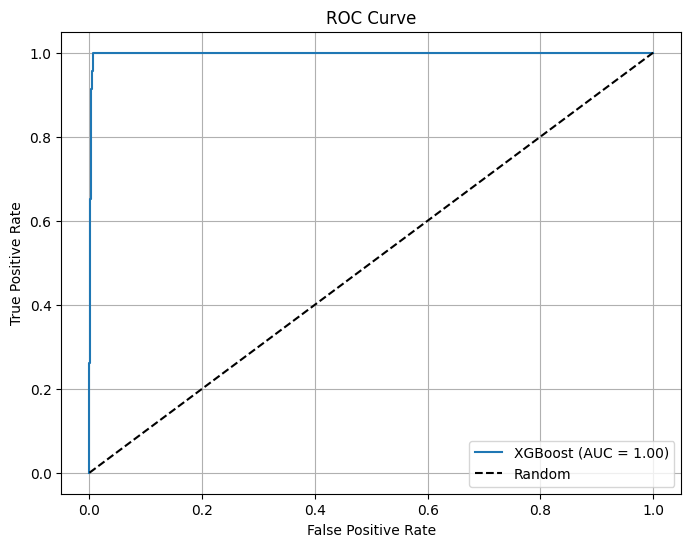

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"XGBoost (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [66]:
print(X_train.columns.tolist())

['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


In [67]:
new_input = {
    'step': 1,  # Add this (set any realistic step value)
    'type': 'TRANSFER',
    'amount': 9000.0,
    'oldbalanceOrg': 10000.0,
    'newbalanceOrig': 1000.0,
    'oldbalanceDest': 5000.0,
    'newbalanceDest': 14000.0
}


In [68]:
import pandas as pd
new_df = pd.DataFrame([new_input])

new_df['type'] = le.transform(new_df['type'])
new_df = new_df[X_train.columns]
prediction = xgb.predict(new_df)
fraud_probability = xgb.predict_proba(new_df)[0][1]

print("Fraud Prediction:", prediction[0])
print("Fraud Probability:", fraud_probability)


Fraud Prediction: 0
Fraud Probability: 1.1884832e-05


In [69]:
custom_threshold = 0.80

if fraud_probability > custom_threshold:
    print(" High Fraud Risky")
else:
    print(" Likely Safe")


 Likely Safe
